Ulaş Nuhoğlu
17712

In [142]:
import pandas as pd
import sys
!{sys.executable} -m pip install reverse_geocoder
!{sys.executable} -m pip install geopy

input = "taxi-trips.csv"

data = pd.read_csv(input)

In [143]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [144]:
#Data description
columnLength = data.shape[0]
rowLength = data.shape[1]
print ("Row count: " + str(rowLength) + " " + "Column count: " + str(columnLength))

Row count: 11 Column count: 118185


In [145]:
print(data.dtypes)
data.describe()

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [146]:
import reverse_geocoder as rGeo

pickupLatitude = data["pickup_latitude"]
pickupLongitude = data["pickup_longitude"]
dropLatitude = data["dropoff_latitude"]
dropLongitude = data["dropoff_longitude"]

pickupData = list(zip(pickupLatitude,pickupLongitude))
dropData = list(zip(dropLatitude,dropLongitude))

pickupResultSet = rGeo.search(pickupData)
dropResultSet = rGeo.search(dropData)

pickupDistrictList = []
dropDistrictList = []

for x in range(len(pickupResultSet)):
    pickupDistrictList.append(pickupResultSet[x]['name'])
    dropDistrictList.append(dropResultSet[x]['name'])
    
data.insert(7,"pickup_district",pickupDistrictList)
data.insert(8,"dropoff_district",dropDistrictList)

In [147]:
data.head()
#checking if our modified table has the new columns

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,pickup_district,dropoff_district,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,Manhattan,Manhattan,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,Long Island City,Manhattan,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,Weehawken,Manhattan,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,Manhattan,Long Island City,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,New York City,New York City,-73.998993,40.722710,N,695


In [148]:
#Extract the top 5 districts where passengers prefer to leave and arrive
print(data['pickup_district'].value_counts().head(5))
print("")
print(data['dropoff_district'].value_counts().head(5))

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


In [149]:
#Create a new column named ”distance” by utilizing pick up and drop oﬀ coordinates
from geopy.distance import geodesic

pickupLatitudes = data["pickup_latitude"]
pickupLongitudes = data["pickup_longitude"]
dropLatitudes = data["dropoff_latitude"]
dropLongitudes = data["dropoff_longitude"]

pickupData = list(zip(pickupLatitudes,pickupLongitudes))
dropOffData = list(zip(dropLatitudes,dropLongitudes))

distanceList = []
for x in range(len(pickupData)):
    distance = geodesic(pickupData[x], dropOffData[x]).kilometers
    distanceList.append(distance)
data.insert(11,"distance",distanceList )

In [150]:
##Our new column "distance" is added
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,pickup_district,dropoff_district,dropoff_longitude,dropoff_latitude,distance,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,Manhattan,Manhattan,-73.964630,40.765602,1.502172,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,Long Island City,Manhattan,-73.973000,40.789989,5.114807,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,Weehawken,Manhattan,-73.978500,40.756191,1.495018,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,Manhattan,Long Island City,-73.953201,40.765068,1.976279,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,New York City,New York City,-73.998993,40.722710,2.513961,N,695


Create a new column named ”time of day” by aggregating timestamps in ”pickup datetime” into 5 diﬀerent categories.

– 7-9 AM: ”rush hour morning”

– 9 AM - 4 PM : ”afternoon”

– 4-6 PM : ”rush hour evening”

– 6-11 PM : ”evening” – 11 PM

- 7 AM:"late night"



In [151]:
from datetime import datetime
import datetime as dt

pickupDates = data["pickup_datetime"]
intervalList = []

seven_AM = dt.time(7,0,0)
nine_AM = dt.time(9,0,0)
four_PM = dt.time(16,0,0)
six_PM = dt.time(18,0,0)
eleven_PM = dt.time(23,0,0)
dateFormat = "%Y-%m-%d %H:%M:%S"

for x in range (len(pickupDates)):
    if datetime.strptime(pickupDates.values[x], dateFormat).time() >= seven_AM and datetime.strptime(pickupDates.values[x],dateFormat).time() < nine_AM:
        intervalList.append("rush hour morning")
    elif datetime.strptime(pickupDates.values[x], dateFormat).time() >= nine_AM and datetime.strptime(pickupDates.values[x],dateFormat).time() < four_PM:
        intervalList.append("afternoon")
    elif datetime.strptime(pickupDates.values[x], dateFormat).time() >= four_PM and datetime.strptime(pickupDates.values[x],dateFormat).time() < six_PM:
        intervalList.append("rush hour evening")
    elif datetime.strptime(pickupDates.values[x], dateFormat).time() >= six_PM and datetime.strptime(pickupDates.values[x],dateFormat).time() < eleven_PM:
        intervalList.append("evening")
    elif datetime.strptime(pickupDates.values[x], dateFormat).time() >= eleven_PM or datetime.strptime(pickupDates.values[x],dateFormat).time() < seven_AM:
        intervalList.append("late night")


data.insert(2,"time_of_day", intervalList)

In [152]:
#Previous cell takes a bit of time
data.head()

,id,vendor_id,time_of_day,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,pickup_district,dropoff_district,dropoff_longitude,dropoff_latitude,distance,store_and_fwd_flag,trip_duration
0,id2875421,2,rush hour evening,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,Manhattan,Manhattan,-73.964630,40.765602,1.502172,N,455
1,id0012891,2,evening,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,Long Island City,Manhattan,-73.973000,40.789989,5.114807,N,1225
2,id3361153,1,rush hour morning,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,Weehawken,Manhattan,-73.978500,40.756191,1.495018,N,526
3,id2129090,1,afternoon,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,Manhattan,Long Island City,-73.953201,40.765068,1.976279,N,1346
4,id0256505,1,afternoon,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,New York City,New York City,-73.998993,40.722710,2.513961,N,695


time_of_day
afternoon            3.109986
rush hour morning    3.128280
rush hour evening    3.342814
evening              3.378136
late night           4.117635
Name: distance, dtype: float64


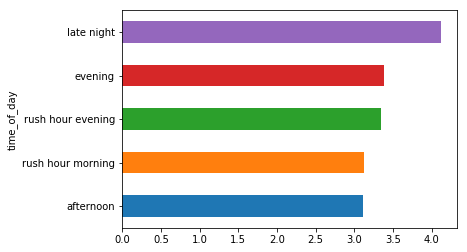

In [153]:
#Show how the average distance varies as time of the day changes
averageDistance = data.groupby(by="time_of_day").mean()["distance"].sort_values()[:5]
print(averageDistance)
averageDistance.plot(kind="barh")

time_of_day
late night            866.095457
evening               893.595329
rush hour morning     918.488716
afternoon             963.922746
rush hour evening    1024.494552
Name: trip_duration, dtype: float64


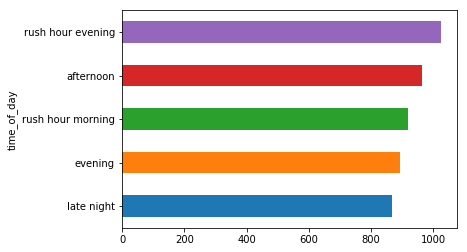

In [154]:
#Show how the trip duration varies as time of the day changes
averageTime=data.groupby(by="time_of_day").mean()["trip_duration"].sort_values()[:5]
print(averageTime)
averageTime.plot(kind="barh")

Hypothesis Testing
1. Does passenger group size affect the distance?

• Null hypothesis: passenger group size has no effect on the distance.

• Apply a suitable statistical test and show the results.

2. Do trip distances increase in weekends?

• Null hypothesis: The day of the week has no effect on the distance.

• Again, apply a suitable statistical test and show the results.

In [155]:
from scipy import stats

singlePassengers = data[(data["passenger_count"] == 1)]
multiPassengers = data[(data["passenger_count"] != 1)]

singleSet = singlePassengers["distance"].values
multiSet = multiPassengers["distance"].values

pTestValue = stats.ttest_ind(a=singleSet, b=multiSet, equal_var=False)
pTestValue

Ttest_indResult(statistic=-4.901086885647343, pvalue=9.555133481557072e-07)

p value is 9.5e-07 meaning it is lower than %5 so passenger group has an effect on the distance.

In [156]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])

singlePassengers = data[(data["pickup_datetime"].dt.dayofweek == 5) | (data["pickup_datetime"].dt.dayofweek == 6 )]
multiPassengers = data[(data["pickup_datetime"].dt.dayofweek != 5) & (data["pickup_datetime"].dt.dayofweek != 6 )]

singleSet = singlePassengers["distance"].values
multiSet = multiPassengers["distance"].values

pValue = stats.ttest_ind(a=singleSet, b=multiSet, equal_var=False)
pValue

Ttest_indResult(statistic=5.604877366928609, pvalue=2.092414433069292e-08)

pValue is 2.1e-08 meaning it is lower than %5 so day of week has an effect on the distance. 